# ¡Hola Fernando! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fernando, tu proyecto está muy bien encaminado. Mostraste un buen dominio en el manejo de los datos, aplicando correctamente las funciones necesarias para explorarlos y limpiarlos, así como para visualizar patrones relevantes. Tus análisis son coherentes y tus interpretaciones reflejan una buena comprensión del contexto del caso de estudio. 

Como sugerencia de mejora, sería ideal que estructures tus análisis de forma más secuencial, comentando tus hallazgos justo después de cada gráfica o tabla, y que explores nuevas formas de visualizar comparaciones entre regiones para facilitar su lectura. Estas mejoras no solo harán tu trabajo más claro, sino también más sólido desde el punto de vista comunicativo. 

Vas por buen camino, sigue afinando los detalles y fortaleciendo tus habilidades de análisis e interpretación.


¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

¿Que juegos tienen exito y porque?



Paso 1

In [1]:
#Comenzamos por importar las librerias pertinentes al analisis 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats as st 
import math as mt 
from matplotlib import pyplot as plt

In [3]:
#cargamos el archivo con la informacion para el analisis y lo inspeccionamos

In [4]:
games_df = pd.read_csv("/datasets/games.csv")

In [5]:
print(games_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

Paso 2 

In [7]:
def cambio_de_columna(df):
    for valor in df:
        df.columns= df.columns.str.lower()
    return df  

In [8]:
df1 = cambio_de_columna(games_df)
df1.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
df1.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
df1.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
#eliminamos ausentes minimos que no representan mucha infromacion ni merman los resultados

In [13]:
df1= df1.dropna(subset = ["name","year_of_release","genre"]).copy()

In [14]:
df1.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [15]:
df1["year_of_release"].isna().sum()

0

In [16]:
#Se rellenan los ausentes de menor importancia para el analisis aprovechando el tipo obj

In [17]:
df1["rating"]= df1["rating"].fillna("no_rating")

In [18]:
df1["rating"].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
RP              1
AO              1
Name: rating, dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [20]:
#se propcede a analizar los datos ausentes restantes

In [21]:
df1.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [22]:
(df1["critic_score"].isna().sum()/len(df1))*100

51.453417659936754

In [23]:
(df1["user_score"].isna().sum()/len(df1))*100

40.166626125030405

In [24]:
df1["user_score"].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.3       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [25]:
#convertiremos los tbd a na para poder ejecutar metricas 

In [26]:
df1["user_score"]= df1["user_score"].replace("tbd",np.nan)

In [27]:
df1["user_score"].isna().sum()

8981

In [28]:
df1.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [29]:
#Al representar mas de la mitad de los datos, y al ser pertinentes para nuestro analisis, por el moneto dejare en blanco los datos faltantes

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.
</div>

In [30]:
#procedo a cambiar tipos de datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [31]:
df1.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [32]:
df1["year_of_release"]=df1["year_of_release"].astype(int)

In [33]:
df1["user_score"]= df1["user_score"].astype(float)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Los valores ausentes que no representaban informacion relevante para la muestra fueron eliminados, los que representan mas de la mitad de la muestra se mantuvieron proque no se podina eliminar o cambiar de valor debido a que sesgaria las metricas y el analisis en general, estos valores estan ausentes por que algunos estan TBD como en user_score, y los demas pueden ser desde falta de datos, perdida de recoleccion, o simplemente fata de puntuacion o de calificacion por parte de la critica o usuarios.

In [35]:
#revisar si hay duplicados

In [36]:
df1.duplicated().sum()

0

In [37]:
df1["total_sales"]= df1["na_sales"] + df1["eu_sales"] + df1["jp_sales"] + df1["other_sales"]

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obteniendo las ventas totales. Si quieres optimizar la suma puedes hacerlo así:

```python
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

```

</div>

In [38]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Paso 3 analisis de datos

In [39]:
juego_por_año = df1.groupby("year_of_release")["name"].size()
juego_por_año


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

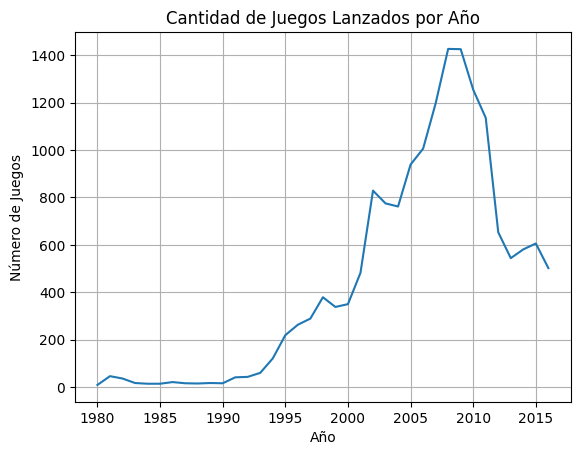

In [40]:
juego_por_año.plot(kind='line')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.grid(True)
plt.show()

In [41]:
df1.groupby("year_of_release").sum()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,,,,,,,
1980,10.59,0.67,0.00,0.12,0.0,0.0,11.38
1981,33.40,1.96,0.00,0.32,0.0,0.0,35.68
1982,26.92,1.65,0.00,0.31,0.0,0.0,28.88
1983,7.76,0.80,8.10,0.14,0.0,0.0,16.80
1984,33.28,2.10,14.27,0.70,0.0,0.0,50.35
1985,33.73,4.74,14.56,0.92,59.0,5.8,53.95
1986,12.50,2.84,19.81,1.93,0.0,0.0,37.08
1987,8.46,1.41,11.63,0.20,0.0,0.0,21.70
1988,23.87,6.59,15.76,0.99,64.0,2.2,47.21


In [42]:
ventas_plataforma = df1.groupby("platform")["total_sales"].sum().sort_values(ascending = False)
ventas_plataforma

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [43]:
top_ventas_platform = ventas_plataforma.head(10).index.tolist()
top_ventas_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [44]:

df_top_plataformas = df1[df1["platform"].isin(top_ventas_platform)]
df_top_plataformas


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


In [45]:
ventas_plataforma_año = df_top_plataformas.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()

<Figure size 1500x800 with 0 Axes>

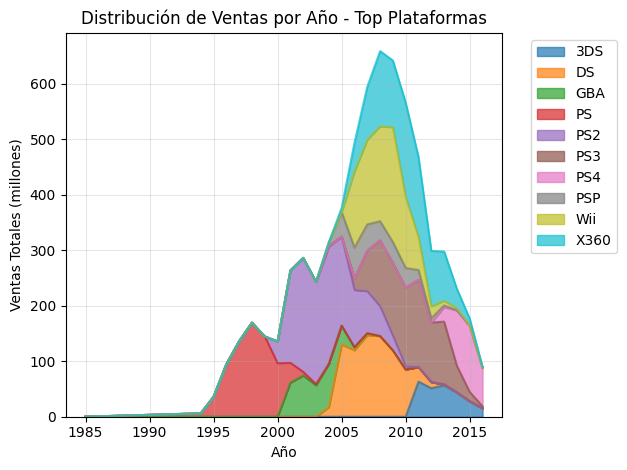

In [46]:
plt.figure(figsize=(15, 8))
ventas_plataforma_año.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Distribución de Ventas por Año - Top Plataformas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El gráfico confirma que cada generación de consolas tiene un ciclo de vida con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. Buen trabajo

</div>

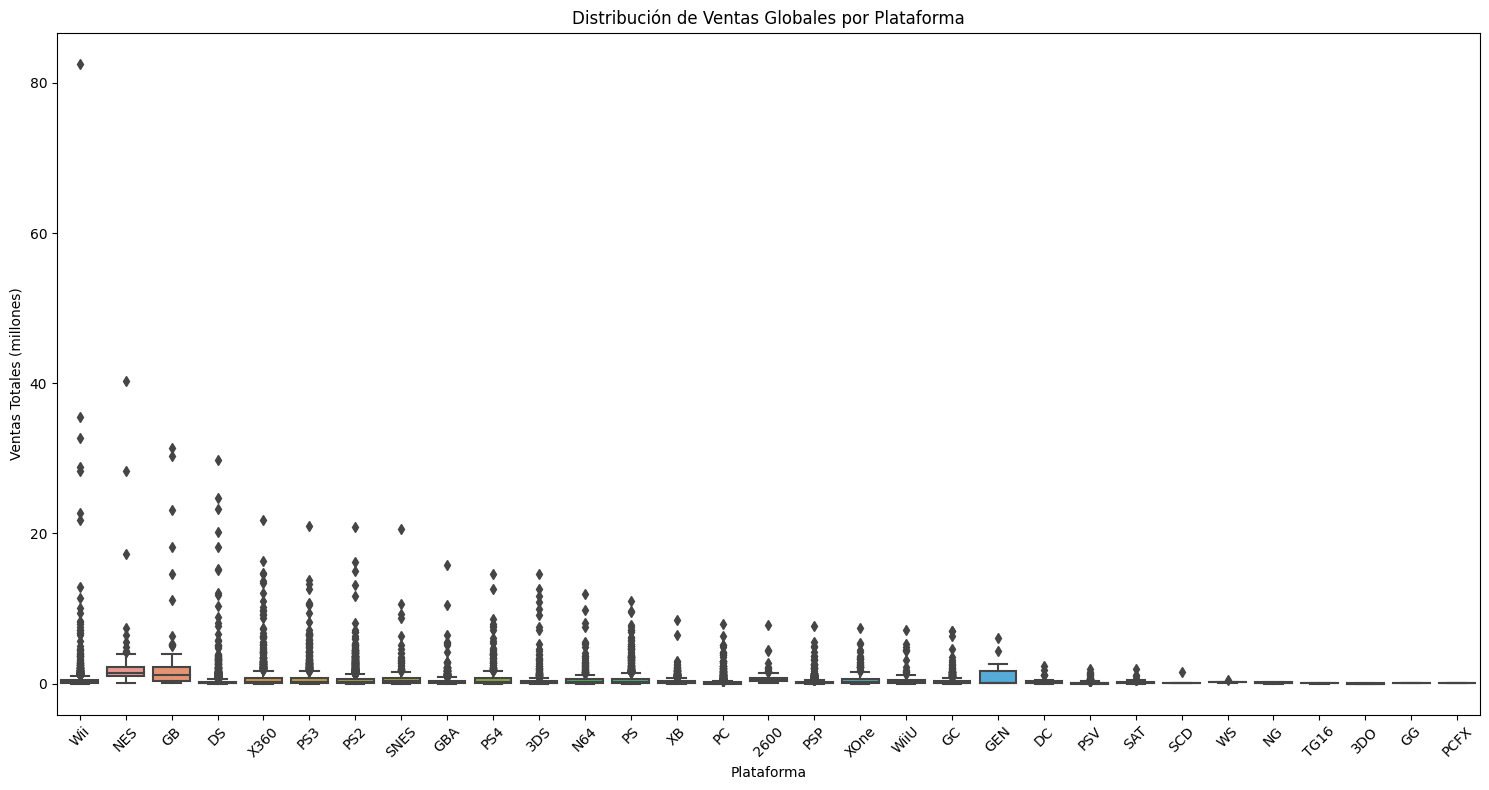

In [47]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica o ajustando el rango del eje Y. Esto facilitará la comparación y el análisis de los datos.

</div>
</div>

In [48]:
ps4_score = df1[df1['platform'] == 'PS4'].copy()

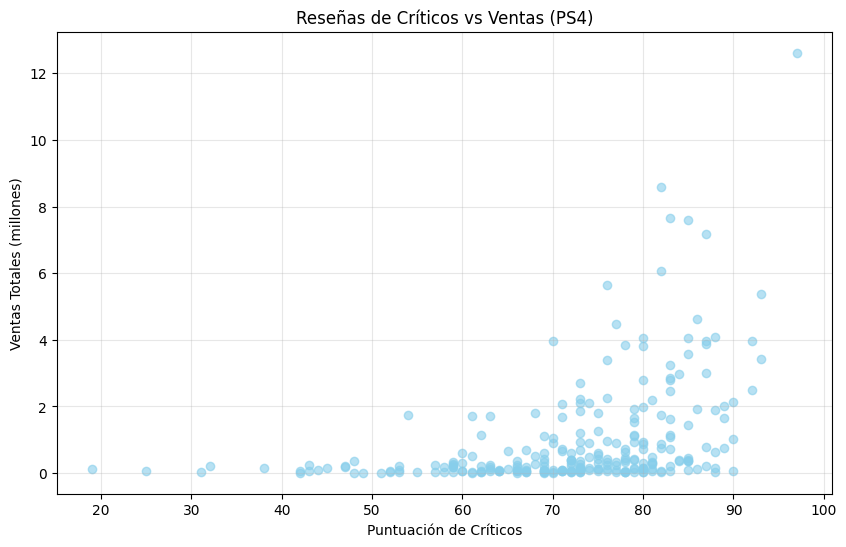

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(ps4_score['critic_score'], ps4_score['total_sales'], alpha=0.6, color='skyblue')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.title('Reseñas de Críticos vs Ventas (PS4)')
plt.grid(True, alpha=0.3)
plt.show()

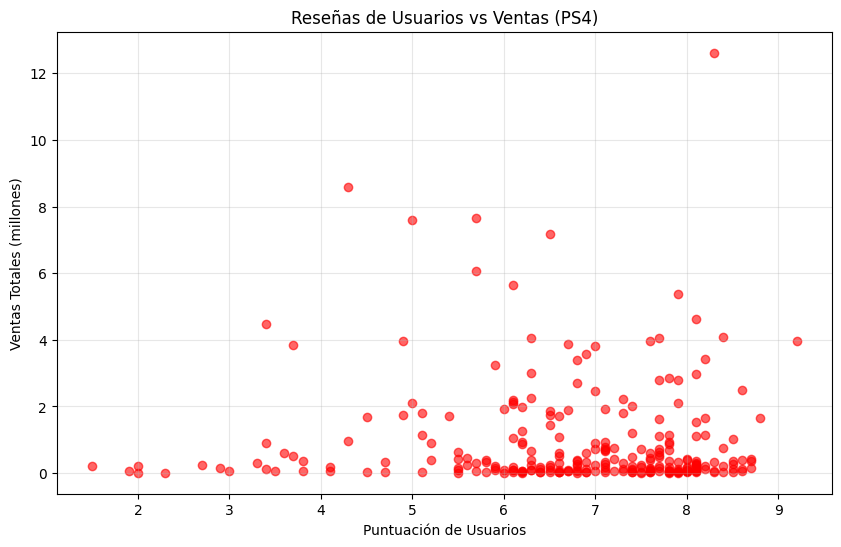

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(ps4_score['user_score'], ps4_score['total_sales'], alpha=0.6, color='red')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.title('Reseñas de Usuarios vs Ventas (PS4)')
plt.grid(True, alpha=0.3)
plt.show()

In [51]:
corr_critic = ps4_score['critic_score'].corr(ps4_score['total_sales'])
corr_user = ps4_score['user_score'].corr(ps4_score['total_sales'])

print("Correlaciones para PS4:")
print(f"Críticos vs Ventas: {corr_critic}")
print(f"Usuarios vs Ventas: {corr_user}")

Correlaciones para PS4:
Críticos vs Ventas: 0.40656790206178095
Usuarios vs Ventas: -0.031957110204556376


In [52]:
ps4_score.max()

name               inFAMOUS: Second Son
platform                            PS4
year_of_release                    2016
genre                          Strategy
na_sales                           6.03
eu_sales                           6.31
jp_sales                           0.49
other_sales                        2.38
critic_score                       97.0
user_score                          9.2
rating                        no_rating
total_sales                       14.63
dtype: object

In [53]:
juegos_plataforma = df1.groupby("name")["total_sales"].sum().sort_values(ascending = False)
top_juegos_plataforma = juegos_plataforma.head(20).index.tolist()

In [54]:

df_juegos_plataforma = df1[df1["name"].isin(top_juegos_plataforma)]
df_juegos_plataforma


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


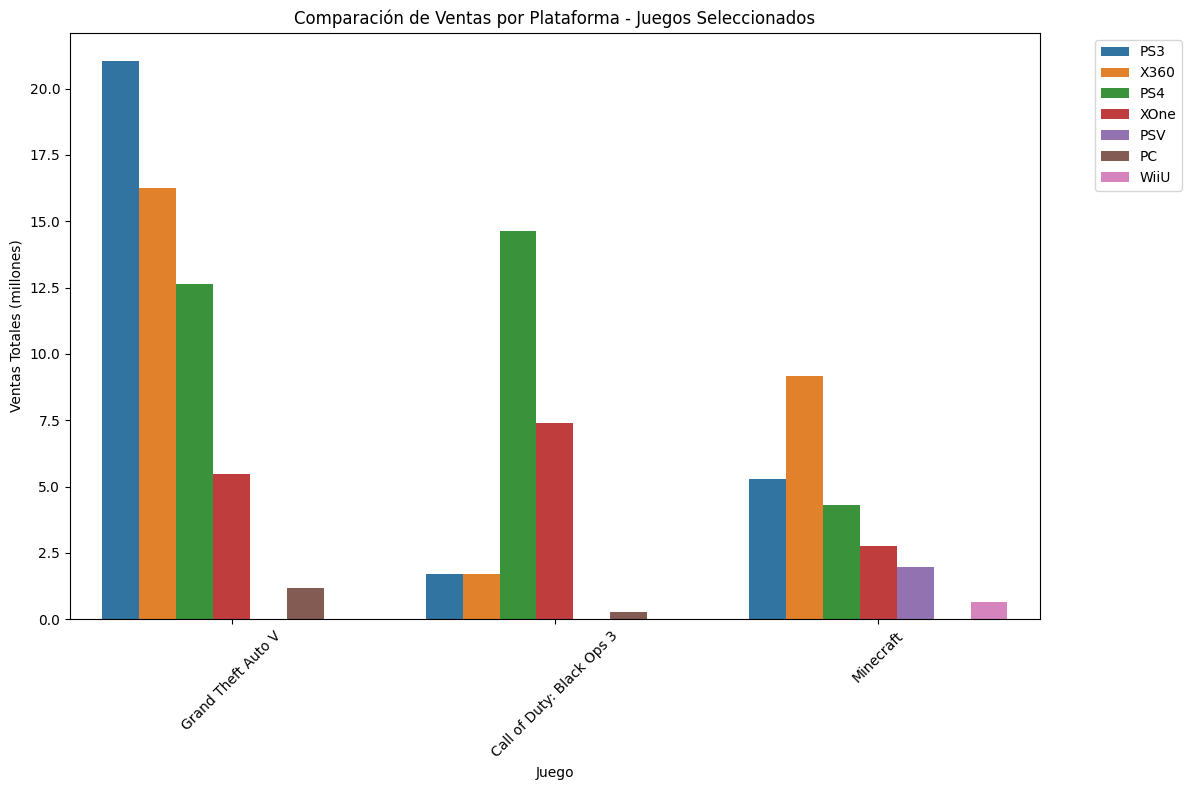

In [55]:

df_comparacion = df_juegos_plataforma[df_juegos_plataforma['name'].isin(['Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'Minecraft'])]
plt.figure(figsize=(12, 8))
sns.barplot(data=df_comparacion, x='name', y='total_sales', hue='platform')
plt.title('Comparación de Ventas por Plataforma - Juegos Seleccionados')
plt.xlabel('Juego')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

In [56]:
genre_sales = df1.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
gen_sa = genre_sales.index.to_list()

In [57]:
genre_sales

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

In [58]:
top_genre_sales = df1[df1["genre"].isin(gen_sa)]

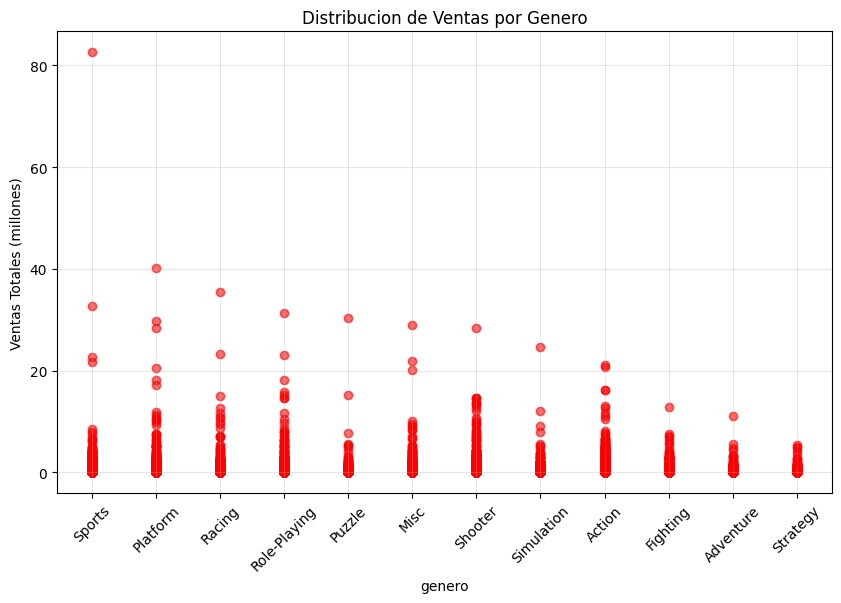

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(top_genre_sales['genre'],top_genre_sales["total_sales"], alpha=0.6, color='red')
plt.xlabel('genero')
plt.ylabel('Ventas Totales (millones)')
plt.title('Distribucion de Ventas por Genero')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

1.- A partir del año 1994 se podria considerar que existen datos significativos para el analisis hasta elñ 2016
2.- las plataformas mas antiguas tienen una vida promedio de 5 años, y las plataformas mas contemporanes tienen un promedio de 10 años, debido a que presentan innovavion al mercado y se siguen producinedo mas y  mejores plataformas
3.- las plataformas mas rentables ppor sus indices de ventas y duracion en el mercado son xbox 360 como lider, seguido por wii y al ultimo toda la familia playstation, esta ultima por su buen promedio de ventas con el tiempo, permanencia en el mercado e innovacion
4.- las ventas globales si son significativamente diferentes, las ventas promedio son bajas, pero algunas presentan datos atipicos los cuales podrian explciarse por moda en el mercado o cierta tendencia por el consumo de una plataforma en especifico ya sea por el lanzamiento de un juego en especifico o diferentes motivos.
5.- las reseñas relevnates para las ventas con un indice de correlacion intermedio son las que realiza la critica especializada, dichas criticas pueden influir positivamente en las ventas de algun juego, el estudio tambien deja en claro que las criticas de los usuarios no influyen en la compra de juegos.
6.- los generos que mas ventas totales cuantifican son Action, Sports y Shooter, los cuales pdorian llegar a ser los mas rentables dependiendo de la inversion que conlleve su desarrollo, otro conjunto de juegos representan menos indice de venta como Puzzle, Aventura y Strategy siendo los mas bajos. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Es fundamental que, a medida que avances en tu proyecto, vayas incluyendo tus análisis e interpretaciones justo después de obtener cada resultado ya que esto permite darle claridad y coherencia a tu trabajo. Es decir, usar una estructura como:

```python
+ Gráfica_1 o Tabla_1
+ Análisis de la información de la gráfica_1 o tabla_1

+ Gráfica_2 o Tabla_2
+ Análisis de la información de la gráfica_2 o tabla_2
.
.
.

```

Este enfoque no solo facilita la comprensión de tus hallazgos, sino que también muestra tu capacidad para interpretar los datos en contexto. Al final del proyecto, podrás redactar una conclusión general que reúna y resuma de manera ordenada toda la información obtenida dándole un enfoque con relación al caso de estudio, permitiendo así cerrar el estudio con una visión integral y bien fundamentada.

</div>

Paso 4

In [60]:
na_platforms = df1.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head().reset_index()
na_platforms

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


<AxesSubplot:title={'center':'top 5 ventas por plataforma en NA'}, xlabel='plataforma', ylabel='ventas(millones)'>

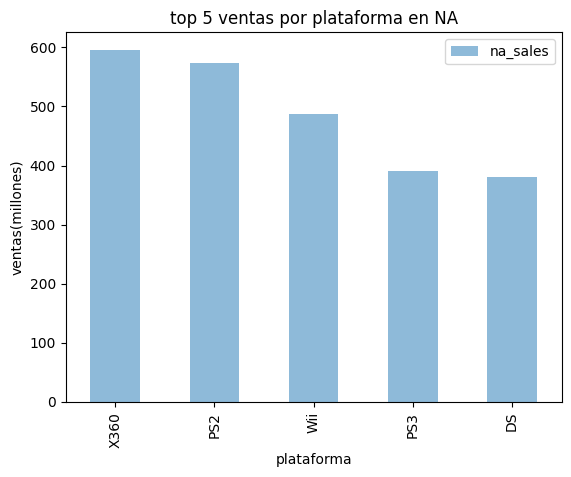

In [61]:
na_platforms.plot(x= "platform",y= "na_sales", kind= "bar", alpha = 0.5,xlabel = "plataforma", 
                  ylabel="ventas(millones)",
                 title = "top 5 ventas por plataforma en NA")


In [62]:
eu_platforms = df1.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head().reset_index()
eu_platforms

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


<AxesSubplot:title={'center':'top 5 ventas por plataforma en EU'}, xlabel='plataforma', ylabel='ventas(millones)'>

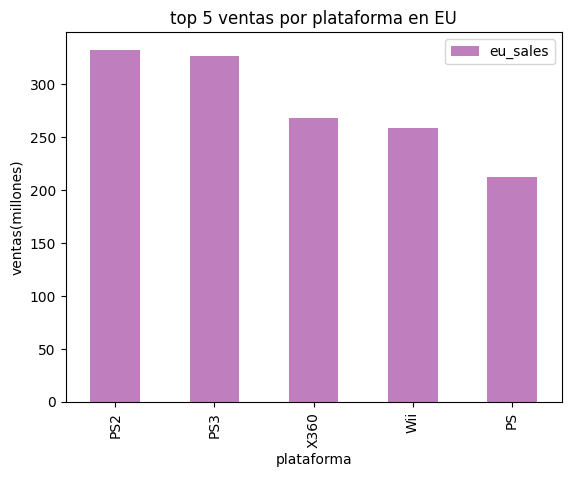

In [63]:
eu_platforms.plot(x= "platform",y= "eu_sales", kind= "bar", alpha = 0.5,xlabel = "plataforma", 
                  ylabel="ventas(millones)",
                 title = "top 5 ventas por plataforma en EU", color = "purple")


In [64]:
jp_platforms = df1.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head().reset_index()
jp_platforms

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


<AxesSubplot:title={'center':'top 5 ventas por plataforma en JP'}, xlabel='plataforma', ylabel='ventas(millones)'>

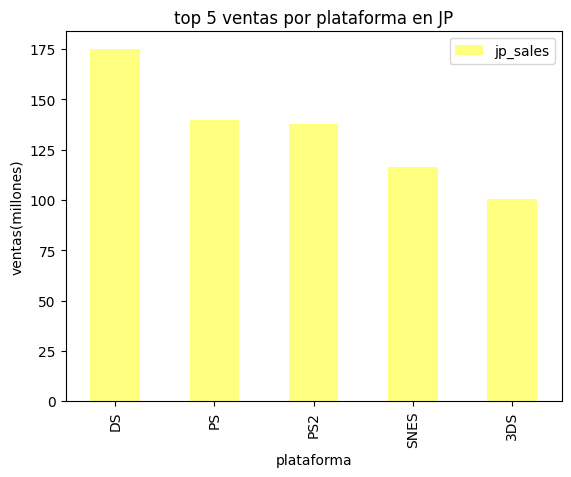

In [65]:
jp_platforms.plot(x= "platform",y= "jp_sales", kind= "bar", alpha = 0.5,xlabel = "plataforma", 
                  ylabel="ventas(millones)",
                 title = "top 5 ventas por plataforma en JP", color = "yellow")


In [66]:
na_genre = df1.groupby("genre")["na_sales"].sum().head().sort_values(ascending=False).reset_index()
na_genre

,genre,na_sales
0,Action,863.17
1,Platform,444.44
2,Misc,399.57
3,Fighting,220.51
4,Adventure,101.52


In [67]:
eu_genre = df1.groupby("genre")["eu_sales"].sum().head().sort_values(ascending=False).reset_index()
na_genre
eu_genre

,genre,eu_sales
0,Action,510.99
1,Misc,210.60
2,Platform,199.39
3,Fighting,99.00
4,Adventure,63.20


In [68]:
jp_genre = df1.groupby("genre")["jp_sales"].sum().head().sort_values(ascending=False).reset_index()
na_genre
jp_genre

,genre,jp_sales
0,Action,160.14
1,Platform,130.71
2,Misc,107.02
3,Fighting,87.28
4,Adventure,52.24


In [69]:
na_rate = df1.groupby("rating")["na_sales"].mean().sort_values(ascending=False).reset_index()
na_rate

,rating,na_sales
0,AO,1.260000
1,K-A,0.853333
2,M,0.483652
3,E,0.324978
4,T,0.257349
5,E10+,0.248026
6,EC,0.191250
7,no_rating,0.183619
8,RP,0.000000


In [70]:
eu_rate = df1.groupby("rating")["eu_sales"].mean().sort_values(ascending=False).reset_index()
eu_rate

,rating,eu_sales
0,AO,0.610000
1,M,0.312500
2,E,0.179513
3,T,0.145194
4,E10+,0.131622
5,no_rating,0.091320
6,K-A,0.090000
7,RP,0.030000
8,EC,0.013750


In [71]:
jp_rate = df1.groupby("rating")["jp_sales"].mean().sort_values(ascending=False).reset_index()
jp_rate

,rating,jp_sales
0,K-A,0.486667
1,no_rating,0.125336
2,T,0.051876
3,E,0.050487
4,M,0.041393
5,E10+,0.028859
6,AO,0.000000
7,EC,0.000000
8,RP,0.000000


1.-Cada region posee una preferencia hacia ciertas platafromas, aun asi las plataformas de na son las que lideran el mercado con un gran volumen de ventas de videojuegos, seguido por eu, por ultimo jp, los cuales tienen preferencia por sus productos locales.
2.-el genero lider en las tres regiones es action, con una buena diferencia, seguidos en general por platform y misc los cuales se concentran en segundo lugar de preferencia y por ultimo peleas y aventura, dentro de los 5 principales.
3.- en las tres regiones la ventas se inclinan en una gran medida por los titulos clasificados para adultos, si estos titulos ya poseen una reestriccion y aun asi son los mas comprados, sin esta misma reestricicon lo seguirian siendo, inclusive podria ser que en mayor medida, por lo cual se puede pensar que los rates no afectan significativamente

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fernando has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

En el siguiente enlace se explica cómo se puede construir: [Gráficos de Barras](https://www.analyticslane.com/2022/07/05/graficos-de-barras-en-matplotlib/)

</div>

</div>

Paso 5

In [72]:
#filtramos los datos
user_score_xbox = df1[df1["platform"]== "XOne"]
user_xbox = user_score_xbox["user_score"].dropna()
user_xbox

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [73]:
user_score_pc = df1[df1["platform"]== "PC"]
user_pc= user_score_pc["user_score"].dropna()
user_pc

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 755, dtype: float64

#ejecutamos la prueba de hipotesis sobre igualdad de medias de dos poblaciones, donde:
Ho : las medias de las calificaciones de usuarios de las plataformas xbox y pc son iguales
Ha: las medias de ambas poblaciones no son iguales

In [74]:
alpha = 0.05
prueba1 = st.ttest_ind (user_xbox,user_pc,equal_var = False)
print("valor P:",prueba1.pvalue)

valor P: 4.5385802963771835e-06


In [75]:
if prueba1.pvalue < alpha:
    print ("Rechazamos Ho")
else:
    print("No se puede Rechazar Ho")

Rechazamos Ho


In [76]:
user_genre_action = df1[df1["genre"]== "Action"]
user_action =user_genre_action["user_score"].dropna()
user_action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1796, dtype: float64

In [77]:
user_genre_sport = df1[df1["genre"]== "Sports"]
user_sport =user_genre_sport["user_score"].dropna()
user_sport

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1081, dtype: float64

#ejecutamos la prueba de hipotesis sobre igualdad de medias de dos poblaciones, donde: Ho : las medias de las calificaciones de usuarios para los generos de accion y deportes son iguales Ha: las medias de ambas poblaciones no son iguales

In [78]:
alpha = 0.05
prueba1 = st.ttest_ind (user_action,user_sport,equal_var = False)
print("valor P:",prueba1.pvalue)

valor P: 0.07370217419278526


In [79]:
if prueba1.pvalue < alpha:
    print ("Rechazamos Ho")
else:
    print("No se puede Rechazar Ho")

No se puede Rechazar Ho


1.- Las hipotesis se formularon a aprtir de lo solciitado, siendo ambas donde se busca saber si ambas medias son iguales o no lo son, el criterio esta basado en la prueba de hipotesis para demostrar igualdad en dos poblaciones.
2.- En el primer caso, se rechaza la hipotesis nula, dando a entender que hay evidencia estadistica de que las medias son diferentes.
3.- En el segundo caso, no se puede rechazar la hipotesis nula,ya que no hay evidencia estadistica de que ambas poblaciones son diferentes.
4.- se realizo el planteamiento igual ya que lo que se busca conocer en ambos casos es si son iguales o diferentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fernando aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

##*Paso 6*

Las ventas de videojuegos son una actividad lucrativa que sin duda requiere un analisis profundo para realmente conocer cuales juegos son los que representan un mayor ingreso a las empresa desarrolladoras de videojuegos. El presente trabajo de analisis demestra entre tantas cosas un conjunto de afirmaciones importantes las cuales se obtuvieron a partir del manejo y estudio de los datos proporcionados, como lo son:
1.- La critica especializada si influye en la venta de videojuegos afectando directamente sus ganancias.
2.- Los juegos mas redituables en base a su volumen de ventas son los de los generos accion, deportes y shooters en ese orden
3.- Que un juego sea lanzado para diversas plataformas, ayuda directamente a que tenga mas exito de ventas.
4.- el ciclo de vida de las plataformas se alargo con los años y de la mano de la innovacion en el sector de desarrollo, lo que permite sacar mas titulos para dicha plataforma.
5.- No hay evidencia de que las clasificaciones de los juegos repercutan a las ventas de los mismos.

In [ ]:
<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>



</div>